In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#import requests
import os
#import datashader as ds
#import datashader.utils as utils
#import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import datashader as ds
#import holoviews as hv
import datashader.utils as utils

from datashader import transfer_functions as tf
import datashader.transfer_functions as tf


if __name__ == "__main__":
    
    
    codex_BCL_2_Tonsil= pd.read_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/codex/logs/codex_Tonsil_30_128_256/tb_logs/codex_Tonsil_30_128_256/version_1/latent_spaces/latent_spaces.csv')
    HE_Tonsil= pd.read_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/H&E/logs/HandE_gray_Tonsil_128_256/tb_logs/HandE_gray_Tonsil_128_256/version_2/latent_spaces/latent_spaces.csv')
    

    codex_BCL_2_Tonsil['primary_site']= codex_BCL_2_Tonsil['primary_site'].replace('Colon', 'BCL_2_Tonsil')
    HE_Tonsil['primary_site']= HE_Tonsil['primary_site'].replace('Colon', 'H&E_Tonsil')


    codex_BCL_2_Tonsil["latent_value"] = codex_BCL_2_Tonsil.apply(lambda row: row["latent_value"].replace("\n", ""), axis=1)
    codex_BCL_2_Tonsil["latent_value"] = codex_BCL_2_Tonsil.apply(lambda row: row["latent_value"].replace(" ", ""), axis=1)
    codex_BCL_2_Tonsil["latent_value"] = codex_BCL_2_Tonsil.apply(lambda row: row["latent_value"].replace("tensor", ""), axis=1)
    codex_BCL_2_Tonsil["latent_value"] = codex_BCL_2_Tonsil.apply(lambda row: row["latent_value"].strip("()"), axis=1)
    codex_BCL_2_Tonsil["latent_value"] = codex_BCL_2_Tonsil.apply(lambda row: row["latent_value"].strip("[]"), axis=1)
    codex_BCL_2_Tonsil["latent_value"] = codex_BCL_2_Tonsil.apply(lambda row: row["latent_value"].split(","), axis=1)
    codex_BCL_2_Tonsil["latent_value"] = codex_BCL_2_Tonsil.apply(lambda row: [float(num) for num in row["latent_value"]], axis=1)
    codex_BCL_2_Tonsil["latent_value"] = codex_BCL_2_Tonsil.apply(lambda row: np.array(row["latent_value"]), axis=1)

    expanded_codex_BCL_2_Tonsil= pd.DataFrame(codex_BCL_2_Tonsil['latent_value'].tolist())

    codex_BCL_2_Tonsil= pd.concat([codex_BCL_2_Tonsil,expanded_codex_BCL_2_Tonsil], axis=1)
    codex_BCL_2_Tonsil= codex_BCL_2_Tonsil.drop('latent_value', axis=1)



    HE_Tonsil["latent_value"] =  HE_Tonsil.apply(lambda row: row["latent_value"].replace("\n", ""), axis=1)
    HE_Tonsil["latent_value"] =  HE_Tonsil.apply(lambda row: row["latent_value"].replace(" ", ""), axis=1)
    HE_Tonsil["latent_value"] =  HE_Tonsil.apply(lambda row: row["latent_value"].replace("tensor", ""), axis=1)
    HE_Tonsil["latent_value"] =  HE_Tonsil.apply(lambda row: row["latent_value"].strip("()"), axis=1)
    HE_Tonsil["latent_value"] =  HE_Tonsil.apply(lambda row: row["latent_value"].strip("[]"), axis=1)
    HE_Tonsil["latent_value"] =  HE_Tonsil.apply(lambda row: row["latent_value"].split(","), axis=1)
    HE_Tonsil["latent_value"] =  HE_Tonsil.apply(lambda row: [float(num) for num in row["latent_value"]], axis=1)
    HE_Tonsil["latent_value"] =  HE_Tonsil.apply(lambda row: np.array(row["latent_value"]), axis=1)

    expanded_HE_Tonsil= pd.DataFrame(HE_Tonsil['latent_value'].tolist())

    HE_Tonsil= pd.concat([HE_Tonsil, expanded_HE_Tonsil], axis=1)
    HE_Tonsil=  HE_Tonsil.drop('latent_value', axis=1)
    
    specific_slide = 'reg001_X03_Y06_Z07'
    


    HE_Tonsil= HE_Tonsil[HE_Tonsil['filename'] == specific_slide].copy()

    df = pd.concat([codex_BCL_2_Tonsil,HE_Tonsil], axis=0)
    df = df.reset_index(drop=True)


   
    
    


    
    

/home/axh5735/miniconda3/envs/test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import scanpy as sc
import anndata as ad


adata = sc.AnnData(
    X=df.iloc[:, 3:]
      
)


a= pd.concat([adata.obs, df['primary_site']], axis=1)
a=a.dropna(subset=['primary_site'])


adata.obs=a

/home/axh5735/miniconda3/envs/test/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/axh5735/miniconda3/envs/test/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/axh5735/miniconda3/envs/test/lib/python3.10/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/axh5735/miniconda3/envs/test/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/axh5735/miniconda3/envs/test/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'uncorrected umap'}, xlabel='UMAP1', ylabel='UMAP2'>

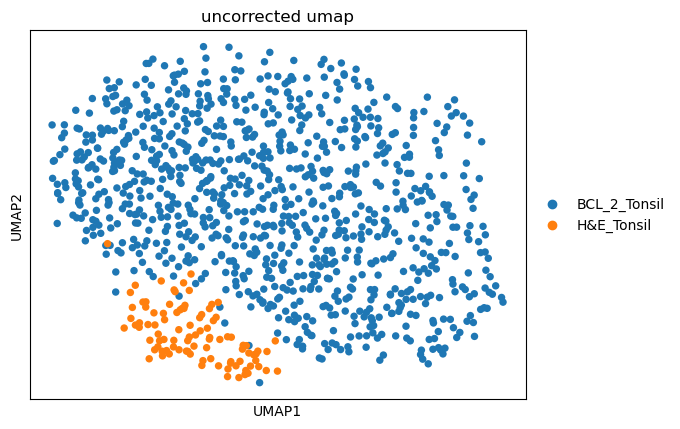

In [3]:
adata=sc.pp.neighbors(adata, copy=True)
adata=sc.tl.umap(adata, copy=True)
sc.pl.umap(adata,color=['primary_site'],title=["uncorrected umap"],show=False)




In [4]:
corrected_features=sc.pp.combat(adata, key='primary_site',inplace=False)
adata_corrected = adata.copy()

adata_corrected.X=corrected_features


/home/axh5735/miniconda3/envs/test/lib/python3.10/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/home/axh5735/miniconda3/envs/test/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'corrected umap'}, xlabel='UMAP1', ylabel='UMAP2'>

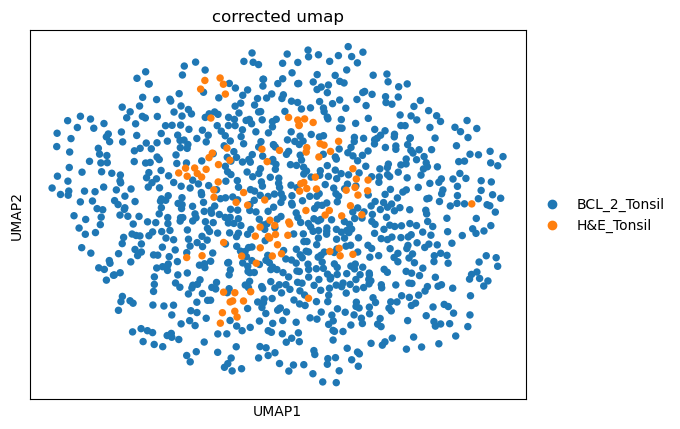

In [5]:
adata_corrected_neighbout = sc.pp.neighbors(adata_corrected, n_neighbors=2, copy=True)
adata_corrected_umap = sc.tl.umap(adata_corrected_neighbout, min_dist=5.0, copy=True, spread=4)
sc.pl.umap(adata_corrected_umap,color=['primary_site'],title=["corrected umap"],show=False)



In [6]:
corrected_df= pd.DataFrame(corrected_features)
filename_corrected_df = pd.DataFrame(df['filename'])
sampled__corrected_df= pd.DataFrame(df['sampled_coords'])
primary_corrected_df = pd.DataFrame(df['primary_site'])


corrected_df= pd.concat([primary_corrected_df, corrected_df], axis=1)
corrected_df= pd.concat([sampled__corrected_df, corrected_df], axis=1)
corrected_df= pd.concat([filename_corrected_df, corrected_df], axis=1)
corrected_df

,filename,sampled_coords,primary_site,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
0,reg001_X04_Y09_Z09,"(328, 1143)",BCL_2_Tonsil,-0.701697,-1.134135,-1.482743,-0.761073,0.792242,0.339661,0.160766,...,0.755586,-1.653885,-0.460432,0.098104,2.679639,-0.663673,1.488818,-0.722420,0.830097,0.508386
1,reg001_X04_Y09_Z09,"(725, 468)",BCL_2_Tonsil,-0.259018,-0.591492,-0.348337,0.656765,1.000047,1.153229,0.314432,...,-0.959613,-0.433866,1.144522,0.469971,-0.781324,0.865872,-0.032357,0.249506,0.245842,0.420456
2,reg001_X04_Y09_Z09,"(370, 696)",BCL_2_Tonsil,-0.424625,-0.571077,-1.683984,0.480572,1.405784,1.466620,0.678108,...,1.198034,0.364302,0.390642,1.940502,-0.321983,-0.815949,0.753682,0.302583,1.755195,-0.049128
3,reg001_X04_Y09_Z09,"(868, 1041)",BCL_2_Tonsil,1.348311,1.391687,0.246533,-1.229864,1.211980,1.120323,0.862645,...,2.029194,-0.034653,0.534610,0.170706,-0.017389,-0.079566,-0.266137,0.148546,-0.692481,0.267021
4,reg001_X04_Y09_Z09,"(937, 1078)",BCL_2_Tonsil,0.291161,-0.765262,-0.713470,-0.491289,0.167684,0.328715,0.979627,...,1.371242,0.678281,0.031028,0.553489,0.650966,-0.321001,0.648147,0.546905,-0.253556,0.327572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,reg001_X03_Y06_Z07,"(549, 737)",H&E_Tonsil,-0.093931,0.684811,0.907509,-0.170242,0.973663,-0.012079,-1.298216,...,-0.448411,-0.490722,-1.400698,-0.439436,0.301265,0.857500,-0.580438,-0.326824,-0.690410,-0.909894
1041,reg001_X03_Y06_Z07,"(241, 621)",H&E_Tonsil,1.339338,-0.127018,-0.029938,1.182898,-0.454597,-0.109051,-0.063894,...,-2.304995,-2.323215,-0.162381,-0.535337,1.121106,1.748137,0.883124,-0.893031,0.458390,1.146057
1042,reg001_X03_Y06_Z07,"(937, 1078)",H&E_Tonsil,0.877281,-0.041419,0.163770,-0.162924,0.052309,2.694988,-0.949119,...,-0.471014,-0.059984,0.908021,-0.013382,0.575538,0.133559,-0.177754,0.141164,-0.030391,-0.755982
1043,reg001_X03_Y06_Z07,"(91, 1121)",H&E_Tonsil,-2.224413,1.407101,1.482205,0.037942,0.312520,0.559102,0.203465,...,0.548789,-0.222072,0.181886,-0.589706,-1.003645,-0.848686,0.300556,-0.290029,1.442448,-0.815345


In [7]:
HandE_sample_slide= corrected_df[(corrected_df['primary_site'] == 'H&E_Tonsil') & (corrected_df['filename'] == 'reg001_X03_Y06_Z07')]
database= corrected_df[~((corrected_df['primary_site'] == 'H&E_Tonsil') & (corrected_df['filename'] == 'reg001_X03_Y06_Z07'))]
HandE_sample_slide_array=np.array(HandE_sample_slide)
database_array=np.array(database)


In [ ]:
###########first_way to find most similar patches using centroid based search method################



"""

from sklearn.cluster import KMeans

def metadata_adding(database):
# Specify column names
    column1 = 'filename'
    column2 = 'sampled_coords'
    column3 = 'primary_site'


    result_list = []


    for index, row in database.iterrows():
        result_list.append((row[column1], row[column2], row[column3]))

    
    return result_list




def combine_lists(list1, list2):
    combined_list = []
    for i in range(len(list1)):
        if i < len(list2):
            combined_list.append(list1[i] + (list2[i],))
        else:
            combined_list.append(list1[i] + (None,))
    return combined_list


def Kmeans(database):

   data=np.array(database)
   kmeans = KMeans(n_clusters=3)
   kmeans.fit(data[:,3:])

   cluster_labels = kmeans.labels_
   return cluster_labels,data

def find_mean_of_each_cluster(cluster,num_clusters,data):

    sub_arrays = [[] for _ in range(num_clusters)]
    
    for i,info in enumerate(cluster):
        sub_arrays[info[3]].append((info[0],info[1],info[2],data[i,3:]))

    
    a=sub_arrays[0]
    b=sub_arrays[1]
    c=sub_arrays[2]

    mean_of_clusters=[]

    features_a= [t[3] for t in a]
    features_a=np.array(features_a)
    mean_of_features_a=np.mean(features_a,axis=0)
    mean_of_clusters.append(mean_of_features_a)

    features_b= [t[3] for t in b]
    features_b=np.array(features_b)
    mean_of_features_b=np.mean(features_b,axis=0)
    mean_of_clusters.append(mean_of_features_b)

    features_c= [t[3] for t in c]
    features_c=np.array(features_c)
    mean_of_features_c=np.mean(features_c,axis=0)
    mean_of_clusters.append(mean_of_features_c)

    return mean_of_clusters,sub_arrays


def cos_similarity (mean_of_clusters,HandE_sample_slide_array,patch):

       L_cosine_similarity=[]  
       for j in range(len(mean_of_clusters)):
              
           dot_product= np.dot(HandE_sample_slide_array[patch][3:], mean_of_clusters[j])

           magnitude_a = np.linalg.norm(HandE_sample_slide_array[patch][3:])
           magnitude_b = np.linalg.norm(mean_of_clusters[j])
           cosine_similarity = dot_product / (magnitude_a * magnitude_b)

           L_cosine_similarity.append(cosine_similarity)

        
       cosine_similarity=np.array(L_cosine_similarity)

       return cosine_similarity


def finding_best_centroid(HandE_sample_slide_array,database,patch):  
        

        while(len(database)>200):
    

            metadata=metadata_adding(database)
            cluster_labels,data=Kmeans(database)

            cluster=combine_lists(metadata, cluster_labels)
            

            mean_of_clusters,sub_arrays=find_mean_of_each_cluster(cluster,data=data,num_clusters=3)

            cosine_similarity=cos_similarity(mean_of_clusters,HandE_sample_slide_array,patch)

    
            arg=np.argmax(cosine_similarity)

            selected_sub_arrays=sub_arrays[arg]
        
            selected_sub_database=pd.DataFrame( selected_sub_arrays, columns=['filename', 'sampled_coords', 'primary_site','value'])
            selected_sub_database_value=selected_sub_database['value'].apply(pd.Series)
            selected_sub_database = pd.concat([selected_sub_database, selected_sub_database_value], axis=1)
            selected_sub_database =selected_sub_database.drop('value', axis=1)

            
            database=selected_sub_database

        
        return selected_sub_database

            
           
           
            
                

            
            
                
        

def finding_best_centroid_all_patches(HandE_sample_slide_array,database):
        
        L=[]
    
        for i in range(len(HandE_sample_slide_array)):
        
        
       
             
            selected_sub_database=finding_best_centroid(HandE_sample_slide_array,database,i)

            
            L.append((selected_sub_database,HandE_sample_slide_array[i]))
            
        return L
        
         
            
           

best_centroid_for_each_patch=finding_best_centroid_all_patches(HandE_sample_slide_array,database)


"""


In [ ]:
###########first_way to find most similar patches using centroid based search method################


"""

HandE_codex_similarity=[]

for i in range(len(best_centroid_for_each_patch)):
     
        L_sub=[]
     
        
        patch_data=np.array(best_centroid_for_each_patch[i][1])
        centroid=np.array(best_centroid_for_each_patch[i][0])

        for j in range(len(centroid)):


        

            dot_product = np.dot(centroid[j,3:], patch_data[3:])


            magnitude_a = np.linalg.norm(patch_data[3:])
            magnitude_b = np.linalg.norm(centroid[j,3:])
            cosine_similarity = dot_product / (magnitude_a * magnitude_b)

            L_sub.append((cosine_similarity,centroid[j,0],centroid[j,1],centroid[j,2],patch_data[0],patch_data[1],patch_data[2]))

    
        HandE_codex_similarity.append(L_sub)

"""

In [8]:
###########second_way to find most similar patches using regular search method (for loop) ################



HandE_codex_similarity=[]

for i in range(len(HandE_sample_slide_array)):
     
    L_sub=[]
    for j in range(len(database_array)):

        dot_product = np.dot(HandE_sample_slide_array[i][3:], database_array[j][3:])


        magnitude_a = np.linalg.norm(HandE_sample_slide_array[i][3:])
        magnitude_b = np.linalg.norm(database_array[j][3:])
        cosine_similarity = dot_product / (magnitude_a * magnitude_b)

        L_sub.append((cosine_similarity,database_array[j][0],database_array[j][1],database_array[j][2],HandE_sample_slide_array[i][0],HandE_sample_slide_array[i][1],HandE_sample_slide_array[i][2]))

    
    HandE_codex_similarity.append(L_sub)


In [9]:
L=[]
import heapq
for i in range(len(HandE_codex_similarity)):
       largest_values = heapq.nlargest(5, HandE_codex_similarity[i])
       dataf= pd.DataFrame(largest_values, columns=['similarity','name of the slide','patch coordination','Codex channel',
                                                      'input slide','input patch coordination','H&E'])
       L.append(dataf)
       


In [10]:
concatenated_df = pd.concat(L, ignore_index=True)

In [ ]:
concatenated_df.to_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/Tonsil_images/reg001_X03_Y06_Z07/30.csv', index=False)

In [ ]:

df_0 = pd.read_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/Tonsil_images/reg001_X03_Y06_Z07/0.csv')
df_42 = pd.read_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/Tonsil_images/reg001_X03_Y06_Z07/42.csv')
df_6 = pd.read_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/Tonsil_images/reg001_X03_Y06_Z07/6.csv')
df_9 = pd.read_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/Tonsil_images/reg001_X03_Y06_Z07/9.csv')
df_10 = pd.read_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/Tonsil_images/reg001_X03_Y06_Z07/10.csv')
df_5 = pd.read_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/Tonsil_images/reg001_X03_Y06_Z07/5.csv')
df_7 = pd.read_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/Tonsil_images/reg001_X03_Y06_Z07/7.csv')
df_15 = pd.read_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/Tonsil_images/reg001_X03_Y06_Z07/15.csv')
df_17 = pd.read_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/Tonsil_images/reg001_X03_Y06_Z07/17.csv')
df_18 = pd.read_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/Tonsil_images/reg001_X03_Y06_Z07/18.csv')
df_21 = pd.read_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/Tonsil_images/reg001_X03_Y06_Z07/21.csv')
df_30 = pd.read_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/Tonsil_images/reg001_X03_Y06_Z07/30.csv')

L_df=[df_0,df_42,df_6,df_9,df_10,df_5,df_7,df_15,df_17,df_18,df_21,df_30]



whole_df= pd.concat(L_df, ignore_index=True)
whole_df.to_csv('/home/axh5735/projects/compressed_images_HandE/code/with_umap/H&E_Codex/Tonsil_images/reg001_X03_Y06_Z07/similarity_Tonsil_reg001_X03_Y06_Z07.csv', index=False)

